In [ ]:
1. Deep Learning Project

Table of Contents
 1. **Project Expectations**
 2. **Title**
 3. **Abstract**
 4. **Introduction** <br/>
    4.1 What is the problem <br/>
    4.2 Significance of the subject and its role (with citations) <br/>
    4.3 Planned solution <br/>

 5. **Proposed Method** <br/>
    5.1 General description of the approach <br/>
    5.2 Mathematical Analysis (if applicable) <br/>
 6. **Experiments and Results** <br/>
    6.1 Overview of target experiments and objectives <br/>
    6.2 Experiment setup <br/>
        6.2.1 Experiment 1 (analysis and results)
        6.2.2 Experiment 2 (analysis and results)
    6.3 Summary of improvements and alternative approaches <br/>
 7. **Conclusion**
 8. **References**


# 2. Title

***Skin Cancer Image Classification***

# 3. Abstract

This project aims to develop and apply deep learning models for images of skin cancer. Many CNN variants, such as DenseNet121, VGG19, and ResNet50 are implemented to compare skin cancer photos to enhance the efficiency and accuracy of the classification procedure. The model's performance is enhanced by our careful hyperparameter adjustments, architectural enhancements, and data preprocessing techniques. The completed models are compared to the most recent benchmarks, presenting competitive outcomes, and highlighting opportunities for development.

# 4. Introduction



## 4.1 What is the problem

As one of the most prevalent diseases overall, millions of new cases are recorded worldwide each year for skin cancer. Effective therapy and better patient outcomes depend on early detection and correct diagnosis (Esteva et al., 2017).
A dataset was provided through Kaggle using the link: 'https://www.kaggle.com/c/medical-images-skin-cancer-detection', where we had to load it, preprocess it, train some models, use it, and test the output. Later, the results were analyzed, and conclusions were made.

- [1] Esteva, A., Kuprel, B., Novoa, R. A., Ko, J., Swetter, S. M., Blau, H. M., &
Thrun, S. (2017). Dermatologist-level classification of skin cancer with deep neural networks. *Nature*, 542(7639), 115-118.

## 4.2 Significance of the subject and its role (with citations)
A timely and precise diagnosis can significantly lower the death rate from skin cancer. Dermatologists can benefit from deep learning-based automated systems by having fewer diagnostic errors, efficiently handling large volumes of data, and providing reliable second views (Tschandl et al., 2018).

- [2] Tschandl, P., Rosendahl, C., & Kittler, H. (2018). The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. *Scientific* *Data*, 5, 180161

## 4.3 Planned solution

The proposed solution is to properly handle the dataset provided to train our robust models to get the best model to classify the images.

# 5. Proposed Method



## 5.1 General description of the approach

Our approach consisted of several steps. First, the provided training dataset was downloaded through Kaggle. Then the provided images were preprocessed by resizing, converting to RGB, and normalizing. In addition, the histogram of the provided training labels was plotted. This plot indicated an imbalance of the training data. The label ‘nv’ was dominant. Afterwards, data augmentation was performed on the underrepresented labels to increase efficiency. Furthermore, the augmented data was split to 80% for training and 20% percent for testing. Using the training and validation dataset our chosen pretrained models were trained. Later, the trained models were used to predict the test dataset. The test dataset went through the exact preprocessing as the training set. Finally, three top performing models were selected.




## 5.2 Mathematical Analysis (if applicable)
- If your method involves mathematical analysis, include it in this section.
- You can use LaTeX syntax for mathematical equations and expressions.

# 6. Experiments and Results



## 6.1 Overview of target experiments and objectives

The preprocessed training dataset was used to train three pretrained CNN model. Experiment 1 includes the codes and steps used to train DenseNet121, experiment 2 introduces VGG19, and experiment 3 includes ResNet50. 

## 6.2 Experiment setup

### 6.2.1 Experiment 1 (analysis and results)


Step 1: Loading and preprocessing the Dataset.

In [1]:
#the link to downlaod the images
!pip install opendatasets
import opendatasets as od
kdataset_url = 'https://www.kaggle.com/c/medical-images-skin-cancer-detection'

od.download(kdataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  mariethereseyounan


Your Kaggle Key:

  ································


100%|██████████| 2.58G/2.58G [00:24<00:00, 112MB/s] 



Extracting archive ./medical-images-skin-cancer-detection/medical-images-skin-cancer-detection.zip to ./medical-images-skin-cancer-detection


In [2]:
import pandas as pd
import os
import os.path as osp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
def load_data_with_labels(directory, cpath):
    images = []
    labels = []
    df = pd.read_csv(cpath)
    for _, row in df.iterrows():
        extension = ['.jpg']
        img_path = None
        for ext in extension:
            p = osp.join(directory, row['image_id'] + ext)
            if osp.exists(p):
                i_path = p
                break


        I = Image.open(i_path)
        I = I.resize((128, 128))
        I = I.convert('RGB')
        I = np.array(I) / 255.0
        images.append(I)
        labels.append(row['label'])

    image = np.array(images)
    L = np.array(labels)
    return image, L

In [3]:
#load the dataset using the provided links
datapath= './medical-images-skin-cancer-detection'
trainpath = os.path.join(datapath, 'train', 'train')
labelpath = osp.join(datapath, 'train_labels.csv')

# data to be loaded
X_train, y_train = load_data_with_labels(trainpath , labelpath )

Step2: Studying the sample

In [4]:
from sklearn.preprocessing import LabelEncoder
#perform labelencoder
lencoder = LabelEncoder()
y_train_encoded = lencoder.fit_transform(y_train)

Text(0.5, 0, 'Labels')

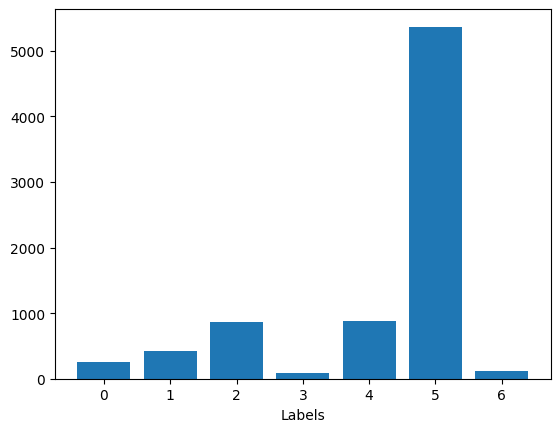

In [5]:
#plot the histogram of the labels provided
Lhistogram = np.bincount(y_train_encoded )

# Plot the histogram
plt.bar(np.arange(len(Lhistogram )), Lhistogram )
plt.xlabel('Labels')

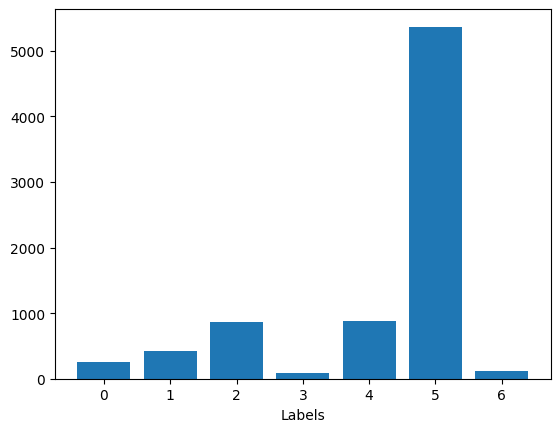

The provided dataset is imbalanced, showing label 5 ('nv') is the dominant one.

Step3: Performing data augmentation on the other labels.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#define the function to augment
def A_labels(X, y,label, count):
    indix = np.where(y == label)[0]
    class_images = X[indix]
    A_images = []
  # use the image generator to rotate /shift/etc..
    datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # find the number of augmented images needed

    num_class_images = len(class_images)
    Atotal = count * num_class_images

    # produce the images in a dynamic way
    for image in class_images:
        image = image.reshape((1,) + image.shape)  #change the shape of the image
        for _ in range(count):
            for batch in datagen.flow(image, batch_size=1):
                A_images.append(batch[0])
                if len(A_images) >= Atotal:
                    break
            if len(A_images) >= Atotal:
                break

    return np.array(A_images), np.full(len(A_images), label)

2024-05-31 14:59:28.414394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 14:59:28.414522: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 14:59:28.537755: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:
#Find the classes that are under represented
c_counts = np.bincount(y_train_encoded )
u_classes = np.where(c_counts < np.mean(c_counts))[0]
print("underrepresented classes:"+str(u_classes))

underrepresented classes:[0 1 2 3 4 6]


underrepresented classes:[0 1 2 3 4 6]

In [8]:
# Perform augmentation first time
count = 1  # augment the misrepresented data one time
new_images = []
new_labels = []
for clabel in u_classes:
    aug_images, aug_labels = A_labels(X_train, y_train_encoded, clabel, count )
    new_images.append(aug_images)
    new_labels.append(aug_labels)

# Create the new dataset
X_train_aug = np.concatenate([X_train] + new_images)
y_train_aug = np.concatenate([y_train_encoded] + new_labels)

In [9]:
#decided to delete old training set for ram space
del X_train,y_train_encoded

In [10]:
#repeated data augmentation for 2nd time for another round for the least misrepresented labels
#Find the classes that are under represented
c_counts = np.bincount(y_train_aug )
u_classes = np.where(c_counts < np.mean(c_counts)-1000)[0]
print("underrepresented classes for 2nd round:"+str(u_classes))

underrepresented classes for 2nd round:[0 3 6]


underrepresented classes for 2nd round:[0 3 6]

In [11]:
# Perform augmentation 2nd time
count = 3  # augment the misrepresented data one time
new_images = []
new_labels = []
for clabel in u_classes:
    aug_images, aug_labels = A_labels(X_train_aug , y_train_aug, clabel, count )
    new_images.append(aug_images)
    new_labels.append(aug_labels)

# Create the new dataset
X_train_aug = np.concatenate([X_train_aug] + new_images)
y_train_aug= np.concatenate([y_train_aug] + new_labels)

Text(0.5, 0, 'Label')

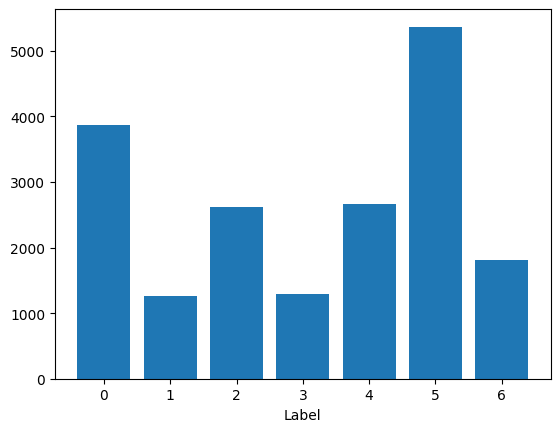

In [12]:
#plot the new histogram
label_histogram = np.bincount(y_train_aug)

# Plot the histogram
plt.bar(np.arange(len(label_histogram)), label_histogram)
plt.xlabel('Label')

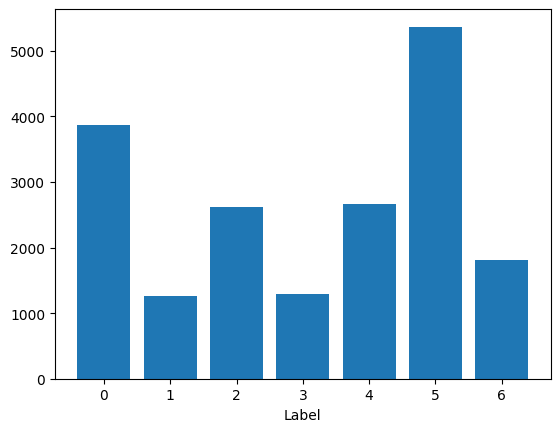

**Step 4:** Split the data for traning (80%) and validation (20%). Ensure all classes are splitted equally using stratify sampling 

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_aug, y_train_aug, test_size=0.2, random_state=42, stratify=y_train_aug)#ensure equal split of classes

del X_train_aug, y_train_aug #delete to free the RAM


**Step 5**:The first model was created Using DenseNet121 with one extra hidden layer. Drop out layer was added to overcome overfitting. The score of prediction was 0.841.

DenseNets are split up into DenseBlocks, where the number of filters applied varies across DenseBlocks while the feature maps' size and dimensions stay constant. Rahi et al. (2019) state that the intermediate layers, also known as Transition Layers, manage downsampling through two 2x2 pooling layers, one 1x1 convolution, and batch normalization. 
In a paper by (Kousis et al., 2022), Densenet121 had an accuracy of 91.20%. 


In [14]:
#Model 1 - DenseNet121
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Bmodel = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add layers 
x = Bmodel.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # for regularization
predictions = Dense(7, activation='softmax')(x)  # detecting 7 clases

model = Model(inputs=Bmodel.input, outputs=predictions)


# Create the Adam optimizer with the specified learning rate
l_rate = 1e-5
optimizer = Adam(learning_rate=l_rate)
#comple the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to overcome overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model 
history=model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=8,  validation_data=(X_val, to_categorical(y_val)),callbacks=[early_stopping])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1717167864.208088     139 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1888/1888 ━━━━━━━━━━━━━━━━━━━━ 322s 95ms/step - accuracy: 0.5139 - loss: 1.4596 - val_accuracy: 0.7883 - val_loss: 0.5788
Epoch 2/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.7568 - loss: 0.7077 - val_accuracy: 0.8347 - val_loss: 0.4525
Epoch 3/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8012 - loss: 0.5598 - val_accuracy: 0.8564 - val_loss: 0.3995
Epoch 4/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8313 - loss: 0.4805 - val_accuracy: 0.8715 - val_loss: 0.3542
Epoch 5/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.8601 - loss: 0.4001 - val_accuracy: 0.8850 - val_loss: 0.3179
Epoch 6/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8775 - loss: 0.3465 - val_accuracy: 0.8906 - val_loss: 0.3008
Epoch 7/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.8997 - loss: 0.2844 - val_accuracy: 0.8914 - val_loss: 0.2989
Epoch 8/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9124 - loss: 0.2

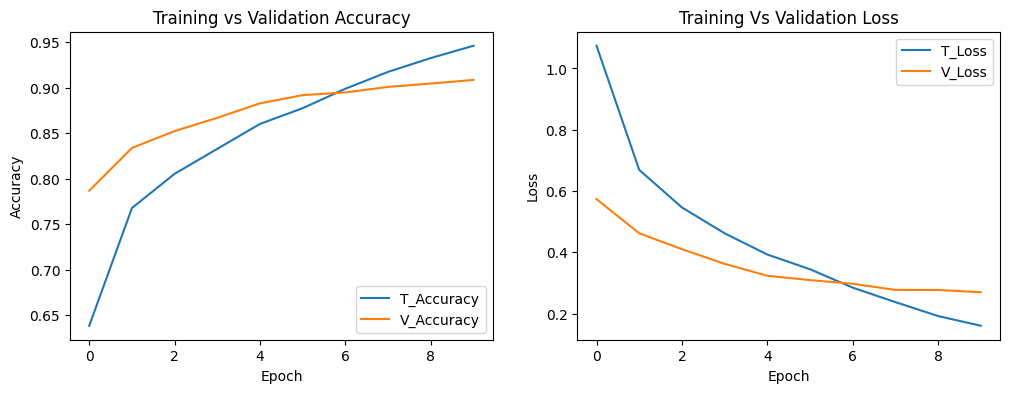

In [19]:
#Plot the history of training

plt.figure(figsize=(12, 4))

# plot the Accuracy vs val_accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='T_Accuracy')
plt.plot(history.history['val_accuracy'], label='V_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# plot the loss vs Validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='T_Loss')
plt.plot(history.history['val_loss'], label='V_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training Vs Validation Loss')

plt.show()


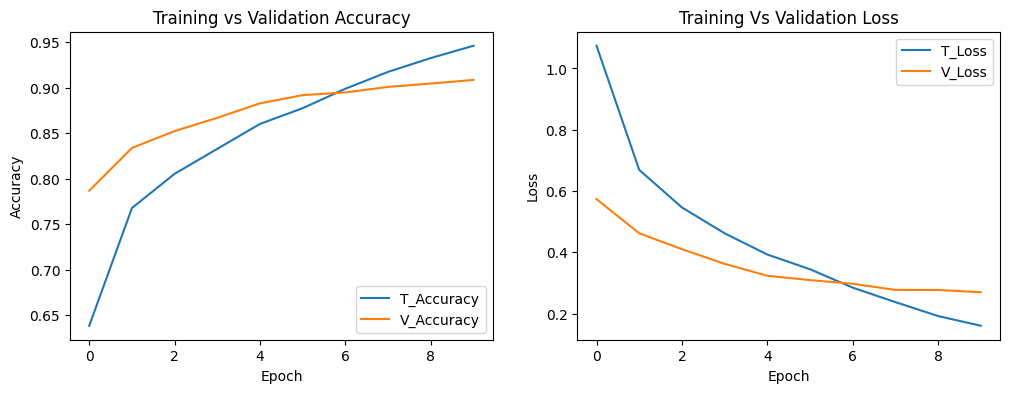

**Step 6:** Download, preprocess the Test set,followed by prediction using Model 1 


In [20]:
label_tostr = {0:'akiec',1:'bcc',2: 'bkl',3: 'df',4: 'mel', 5:'nv',6:'vasc'}

In [22]:
def load_test_data(i_dir):
    images = []
    i_ids = []
    for i_file in os.listdir(i_dir):
        path = osp.join(i_dir, i_file)
        I = Image.open(path)
        I = I.resize((128, 128))
        I = I.convert('RGB')
        I = np.array(I) / 255.0
        images.append(I)
        i_ids.append(osp.splitext(i_file)[0])

    
    X = np.array(images)
    return X, i_ids

# Load and perform preprocessing to the test images
image_dir = os.path.join(datapath, 'test', 'test') # Set your image directory path here
X_test, ids = load_test_data(image_dir)

# do the predictions using the trained model
predict = model.predict(X_test)

# Convert the predictions to class labels
labels = [label_tostr[np.argmax(pred)] for pred in predict]

# DataFrame created with id of image and labels
predictions_list = [{'id': image_id, 'target': label} for image_id, label in zip(ids,labels)]
predictions_df = pd.DataFrame(predictions_list)

# save in CSV file
predictions_df.to_csv('results.csv', index=False)



63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


### 6.2.2 Experiment 2 (analysis and results)
The second model included VGG19 with two layers. The Prediction score was 0.827.

VGG19 is an enhanced version of VGG16. The deep CNN VGG19 is composed of many convolutional layers and max pooling layers, which are also known as feature extractors. These layers are followed by at least one fully linked layer, also known as a classifier (Simonyan & Zisserman, 2014). In a paper by (Jain et al., 2021), VGG19 had an accuracy of 67.54% on skin cancer classification. 


In [23]:
#Model 2 - VGG19
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Bmodel = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add layers 
x = Bmodel.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # for regularization
x=Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # for regularization
predictions = Dense(7, activation='softmax')(x)  # detecting 7 clases

model = Model(inputs=Bmodel.input, outputs=predictions)

# Create the Adam optimizer with the specified learning rate
l_rate = 1e-5
optimizer = Adam(learning_rate=l_rate)
#comple the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to overcome overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model 
history=model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=8,  validation_data=(X_val, to_categorical(y_val)),callbacks=[early_stopping])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
   2/1888 ━━━━━━━━━━━━━━━━━━━━ 3:06 99ms/step - accuracy: 0.0000e+00 - loss: 2.5355   

W0000 00:00:1717156608.426679      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1888/1888 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5409 - loss: 1.2778

W0000 00:00:1717156747.311399      86 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1717156750.280989      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1888/1888 ━━━━━━━━━━━━━━━━━━━━ 181s 83ms/step - accuracy: 0.5410 - loss: 1.2776 - val_accuracy: 0.7860 - val_loss: 0.6201
Epoch 2/10


W0000 00:00:1717156764.725008      84 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.7803 - loss: 0.6068 - val_accuracy: 0.8103 - val_loss: 0.5539
Epoch 3/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 135s 72ms/step - accuracy: 0.8183 - loss: 0.5011 - val_accuracy: 0.8336 - val_loss: 0.4585
Epoch 4/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.8498 - loss: 0.4114 - val_accuracy: 0.8654 - val_loss: 0.3707
Epoch 5/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.8801 - loss: 0.3417 - val_accuracy: 0.8580 - val_loss: 0.3737
Epoch 6/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.8955 - loss: 0.2929 - val_accuracy: 0.8689 - val_loss: 0.3655
Epoch 7/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9189 - loss: 0.2376 - val_accuracy: 0.8840 - val_loss: 0.3236
Epoch 8/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9332 - loss: 0.1888 - val_accuracy: 0.8615 - val_loss: 0.5139
Epoch 9/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9450 - lo

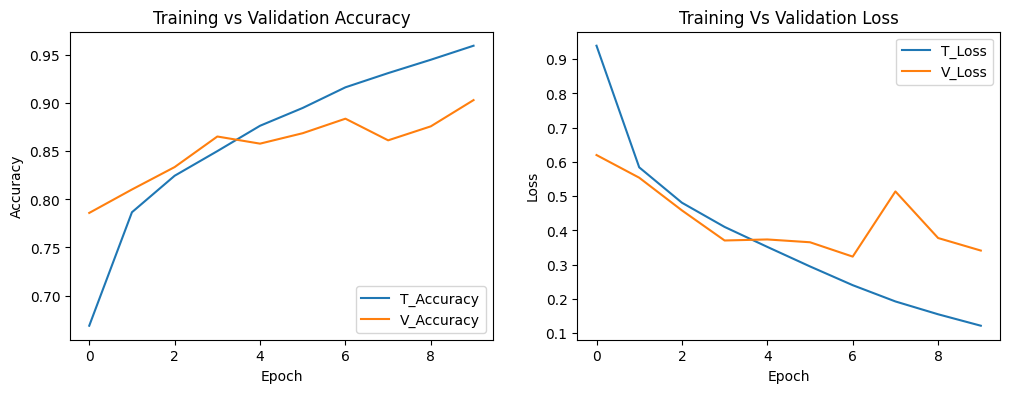

In [24]:
#Plot the history of training

plt.figure(figsize=(12, 4))

# plot the Accuracy vs val_accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='T_Accuracy')
plt.plot(history.history['val_accuracy'], label='V_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# plot the loss vs Validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='T_Loss')
plt.plot(history.history['val_loss'], label='V_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training Vs Validation Loss')

plt.show()


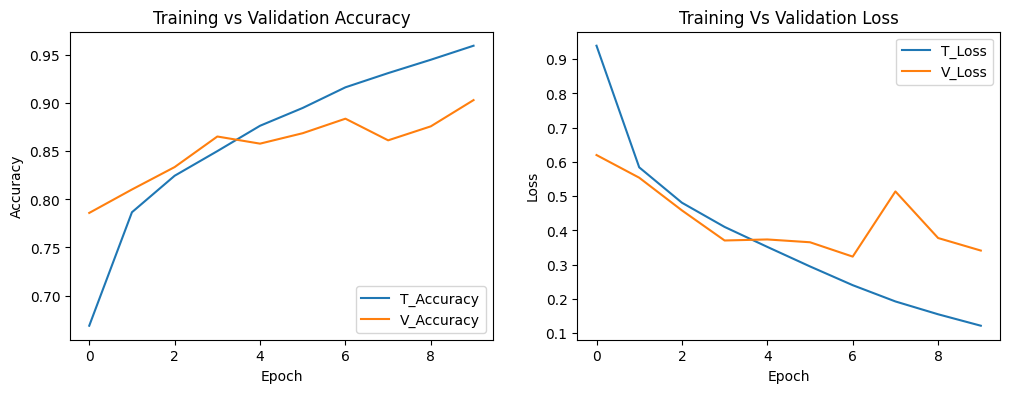

In [ ]:
def load_test_data(i_dir):
    images = []
    i_ids = []
    for i_file in os.listdir(i_dir):
        path = osp.join(i_dir, i_file)
        I = Image.open(path)
        I = I.resize((128, 128))
        I = I.convert('RGB')
        I = np.array(I) / 255.0
        images.append(I)
        i_ids.append(osp.splitext(i_file)[0])

    
    X = np.array(images)
    return X, i_ids

# Load and perform preprocessing to the test images
image_dir = os.path.join(datapath, 'test', 'test') # Set your image directory path here
X_test, ids = load_test_data(image_dir)

# do the predictions using the trained model
predict = model.predict(X_test)

# Convert the predictions to class labels
labels = [label_tostr[np.argmax(pred)] for pred in predict]

# DataFrame created with id of image and labels
predictions_list = [{'id': image_id, 'target': label} for image_id, label in zip(ids,labels)]
predictions_df = pd.DataFrame(predictions_list)

# save in CSV file
predictions_df.to_csv('results.csv', index=False)

### 6.2.3 Experiment 3 (analysis and results)
The third model included ResNet50 with one layer. The Prediction score was 0.819.

ResNet50 are the deeper convolutional neural networks that employ skip connections. In addition to significantly resolving gradient degradation, these residual blocks also lower overall parameters (Debgupta et al., 2020). In a paper by (Jain et al., 2021), Resnet50, had an accuracy of 82.32%.


In [15]:
#Model 3 - ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

Bmodel = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add layers 
x = Bmodel.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # for regularization
predictions = Dense(7, activation='softmax')(x)  # detecting 7 clases

model = Model(inputs=Bmodel.input, outputs=predictions)


# Create the Adam optimizer with the specified learning rate
l_rate = 1e-5
optimizer = Adam(learning_rate=l_rate)
#comple the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Use early stopping to overcome overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

# Train the model 
history=model.fit(X_train, to_categorical(y_train), epochs=10, batch_size=8,  validation_data=(X_val, to_categorical(y_val)),callbacks=[early_stopping])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 165s 55ms/step - accuracy: 0.5806 - loss: 1.2229 - val_accuracy: 0.8164 - val_loss: 0.5110
Epoch 2/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8005 - loss: 0.5613 - val_accuracy: 0.8538 - val_loss: 0.3999
Epoch 3/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8523 - loss: 0.4187 - val_accuracy: 0.8723 - val_loss: 0.3616
Epoch 4/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.8817 - loss: 0.3236 - val_accuracy: 0.8861 - val_loss: 0.3288
Epoch 5/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9228 - loss: 0.2260 - val_accuracy: 0.8869 - val_loss: 0.3282
Epoch 6/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9451 - loss: 0.1677 - val_accuracy: 0.9028 - val_loss: 0.2991
Epoch 7/10
1888/1888 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9607 - loss: 0.1247 - val_accuracy: 0.9001 - val_loss: 0.3662
Epoch 8/10
1888/1888 ━━━

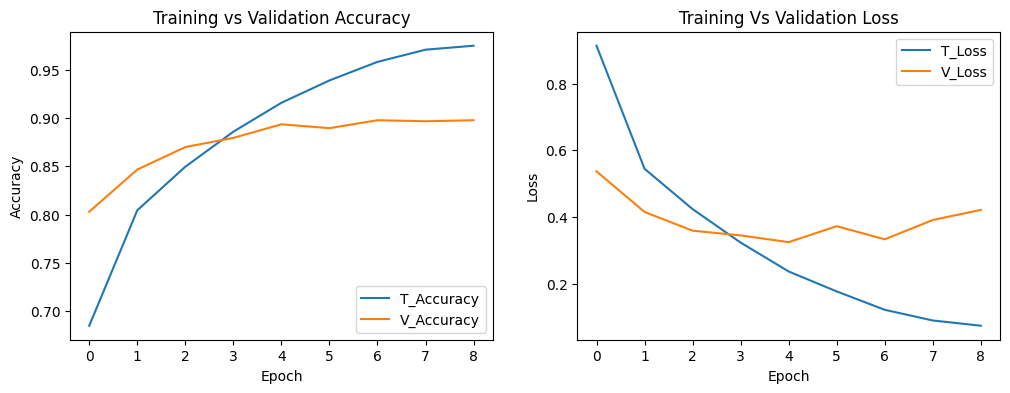

In [26]:
#Plot the history of training

plt.figure(figsize=(12, 4))

# plot the Accuracy vs val_accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='T_Accuracy')
plt.plot(history.history['val_accuracy'], label='V_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# plot the loss vs Validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='T_Loss')
plt.plot(history.history['val_loss'], label='V_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training Vs Validation Loss')

plt.show()

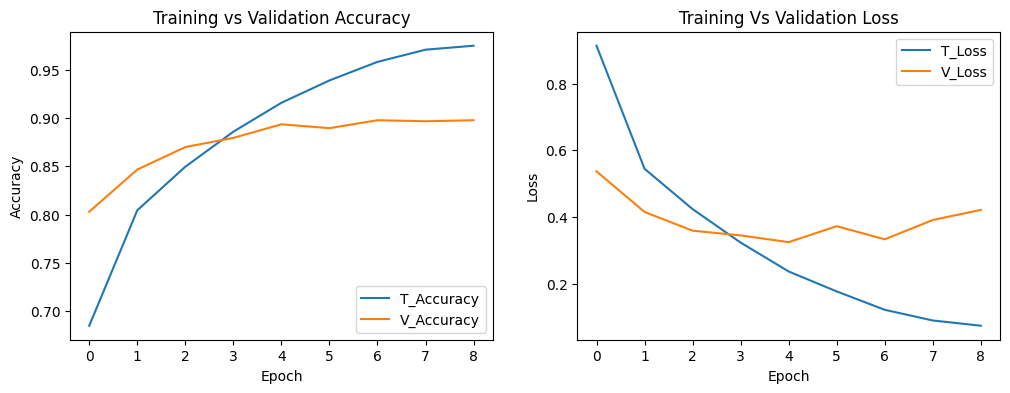

In [ ]:
def load_test_data(i_dir):
    images = []
    i_ids = []
    for i_file in os.listdir(i_dir):
        path = osp.join(i_dir, i_file)
        I = Image.open(path)
        I = I.resize((128, 128))
        I = I.convert('RGB')
        I = np.array(I) / 255.0
        images.append(I)
        i_ids.append(osp.splitext(i_file)[0])

    
    X = np.array(images)
    return X, i_ids

# Load and perform preprocessing to the test images
image_dir = os.path.join(datapath, 'test', 'test') # Set your image directory path here
X_test, ids = load_test_data(image_dir)

# do the predictions using the trained model
predict = model.predict(X_test)

# Convert the predictions to class labels
labels = [label_tostr[np.argmax(pred)] for pred in predict]

# DataFrame created with id of image and labels
predictions_list = [{'id': image_id, 'target': label} for image_id, label in zip(ids,labels)]
predictions_df = pd.DataFrame(predictions_list)

# save in CSV file
predictions_df.to_csv('results.csv', index=False)

## 6.3 Summary of improvements and alternative approaches

DenseNet121 had an accuracy of 94.93%, a validation accuracy of 89.88%, and a leaderboard score of 0.841.
In addition, VGG19 achieved an accuracy of 96%, a validation accurary of 90.3%, and a leaderboard score of 0.827 .
Finally, by training ResNet50 we got an accuracy of 98.26%, a validation accuracy of 90.65%, and a leaderboard score of 0.819 .

The results indicate that DenseNet121 outperforms VGG19 and ResNet50 in terms of generalization to unseen data. All of this is due to the utilization of the correct data augmentation techniques in addition to data preprocessing, and fine tuning which are essential steps to achieve good results.


# 7. Conclusion

Three models were tested using the provided dataset. Prior to testing the dataset, some preprocessing and data augmentation techniques were applied. The three models performed well, with a score above 80%.
While our models performed well, there is still some limitations which limited our preprocessing options related to RAM. 
For future work, different types of data augmentation, fine tuning, and preprocessing methods might be applied to improve the model performances. 

# 8. References
- [1] Esteva, A., Kuprel, B., Novoa, R. A., Ko, J., Swetter, S. M., Blau, H. M., &
      Thrun, S. (2017). Dermatologist-level classification of skin cancer with deep 
      neural networks. *Nature*, 542(7639), 115-118.
- [2] Tschandl, P., Rosendahl, C., & Kittler, H. (2018). The HAM10000 dataset, a large 
      collection of multi-source dermatoscopic images of common pigmented skin lesions. 
      *Scientific* *Data*, 5, 180161.
- [3] Debgupta, R.; Chaudhuri, B.B.; Tripathy, B.K. A Wide ResNet-Based Approach for Age
      and Gender Estimation in Face Images. In Proceedings of the International
      Conference on Innovative Computing and Communications, Singapore, 24 October 2020;
      pp. 517–530.
- [4] K. Simonyan and A. Zisserman, “Very deep convolutional networks for large-scale
      image recognition,” 2014 
- [5] Jain, S., Singhania, U., Tripathy, B., Nasr, E. A., Aboudaif, M. K., & Kamrani, A.
      K. (2021). Deep learning-based transfer learning for classification of skin cancer.
      *Sensors*, 21(23), 8142.
- [6] Rahi, M. M. I., Khan, F. T., Mahtab, M. T., Ullah, A. A., Alam, M. G. R., & Alam,
      M. A. (2019, December). Detection of skin cancer using deep neural networks. *In 
      2019 IEEE Asia-Pacific Conference on Computer Science and Data Engineering (CSDE) *
      (pp. 1-7). IEEE.
- [7] Kousis, I., Perikos, I., Hatzilygeroudis, I., & Virvou, M. (2022). Deep learning
      methods for accurate skin cancer recognition and mobile application. *Electronics,
      11(9),* 1294.
      
      